K最近邻(k-Nearest Neighbor，KNN)分类算法，是一个理论上比较成熟的方法，也是最简单的机器学习算法之一。该方法的思路是：在特征空间中，如果一个样本附近的k个最近(即特征空间中最邻近)样本的大多数属于某一个类别，则该样本也属于这个类别。

## 初识knn算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_matrix = np.array([[3.39, 2.33],
             [3.11, 1.78],
             [1.34, 3.36],
             [3.58, 4.67],
             [2.28, 2.86],
             [7.42, 4.69],
             [5.74, 3.53],
             [9.17, 2.51],
             [7.79, 3.42],
             [7.93, 0.79]])

In [3]:
x_matrix

array([[3.39, 2.33],
       [3.11, 1.78],
       [1.34, 3.36],
       [3.58, 4.67],
       [2.28, 2.86],
       [7.42, 4.69],
       [5.74, 3.53],
       [9.17, 2.51],
       [7.79, 3.42],
       [7.93, 0.79]])

In [4]:
x_matrix.shape

(10, 2)

In [5]:
# 0代表良性，1代表恶性
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_train.shape

(10,)

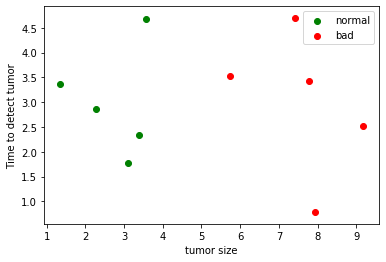

In [6]:
# 绘制特征图
plt.scatter(x_matrix[y_train==0, 0], x_matrix[y_train==0, 1], color='g', label='normal')
plt.scatter(x_matrix[y_train==1, 0], x_matrix[y_train==1, 1], color='r', label='bad')
plt.xlabel('tumor size')
plt.ylabel('Time to detect tumor')
plt.legend()

In [7]:
# 求x点的肿瘤的可能性
x = np.array([8.09, 3.36])

In [8]:
from math import sqrt

distance = []

for point in x_matrix:
    # 求每个点到x点的欧拉距离
    distance.append(sqrt(sum(point - x)**2))

distance

[5.729999999999999,
 6.5600000000000005,
 6.75,
 3.1999999999999997,
 6.3100000000000005,
 0.6600000000000006,
 2.1799999999999997,
 0.22999999999999998,
 0.23999999999999977,
 2.73]

In [9]:
distance = [sqrt(sum(point-x)**2) for point in x_matrix]
distance

[5.729999999999999,
 6.5600000000000005,
 6.75,
 3.1999999999999997,
 6.3100000000000005,
 0.6600000000000006,
 2.1799999999999997,
 0.22999999999999998,
 0.23999999999999977,
 2.73]

In [10]:
np.sort(distance)

array([0.23, 0.24, 0.66, 2.18, 2.73, 3.2 , 5.73, 6.31, 6.56, 6.75])

In [11]:
sort_distance = np.argsort(distance)
sort_distance

array([7, 8, 5, 6, 9, 3, 0, 4, 1, 2])

In [12]:
# 假设选取4个参照对象
k = 6

In [13]:
# 根据索引到target里取分类数据
status = [y_train[i] for i in sort_distance[:k]]
status

[1, 1, 1, 1, 1, 0]

In [14]:
from collections import Counter

In [15]:
counter = Counter(status)
counter

Counter({1: 5, 0: 1})

In [16]:
# 从结果中取筛选最多的那个值
counter.most_common(1)[0][0]

1

In [17]:
def KnnClassify(k, x_matrix, y_train, x):
    from collections import Counter
    from math import sqrt
    distance = [sqrt(sum(point-x)**2) for point in x_matrix]
    sort_distance = np.argsort(distance)
    status = [y_train[i] for i in sort_distance[:k]]
    counter = Counter(status)
    return counter.most_common(1)[0][0]

In [18]:
KnnClassify(k, x_matrix, y_train, x)

1

## sklearn中的knn

### KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# feature_data
x_matrix = np.array([[3.39, 2.33],
             [3.11, 1.78],
             [1.34, 3.36],
             [3.58, 4.67],
             [2.28, 2.86],
             [7.42, 4.69],
             [5.74, 3.53],
             [9.17, 2.51],
             [7.79, 3.42],
             [7.93, 0.79]])
# target
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# predict
predict_x = np.array([8.09, 3.36])

In [21]:
k = 6
# 初始化实例
knn_classifier = KNeighborsClassifier(n_neighbors=k) # 初始化一个实例：领近数

In [22]:
# 拟合模型
knn_classifier.fit?

Signature: knn_classifier.fit(X, y)
Docstring:
Fit the model using X as training data and y as target values

Parameters
----------
X : {array-like, sparse matrix, BallTree, KDTree}
    Training data. If array or matrix, shape [n_samples, n_features],
    or [n_samples, n_samples] if metric='precomputed'.

y : {array-like, sparse matrix}
    Target values of shape = [n_samples] or [n_samples, n_outputs]
File:      /opt/conda/lib/python3.7/site-packages/sklearn/neighbors/base.py
Type:      method


In [23]:
# 拟合模型
knn_classifier.fit(x_matrix, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [24]:
# 预测，预测的数据可以是多个，所以是个矩阵：array([[8.09, 3.36]])
result = knn_classifier.predict(predict_x.reshape(1, -1))
result

array([1])

In [25]:
result[0]

1

### 模型测试

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris() 
x = iris.data
y = iris.target

In [27]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [28]:
X_train.shape

(120, 4)

In [29]:
x_test.shape

(30, 4)

In [31]:
y_train.shape

(120,)

In [32]:
y_test.shape

(30,)

In [34]:
k = 6
# 初始化实例
knn_classifier = KNeighborsClassifier(n_neighbors=k) # 初始化一个实例：领近数
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(x_test)
y_predict

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2])

In [35]:
y_test

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2])

In [36]:
sum(y_predict == y_test)/ len(y_test)

1.0

### accuracy_score

In [38]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [40]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

1. 有5620个样本
2. 每个样本有64个特征属性
3. 每个特征是：范围为0..16的整数像素的8x8图像
4. 总共有10个分类，用0到9表示

***或者可以通过datasets.load_digits?查看，实际样本只有1797个样本，特征值是用0到16的数字表示,target有10个***

In [41]:
datasets.load_digits?

Signature: datasets.load_digits(n_class=10, return_X_y=False)
Docstring:
Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

=================   ==============
Classes                         10
Samples per class             ~180
Samples total                 1797
Dimensionality                  64
Features             integers 0-16
=================   ==============

Read more in the :ref:`User Guide <digits_dataset>`.

Parameters
----------
n_class : integer, between 0 and 10, optional (default=10)
    The number of classes to return.

return_X_y : boolean, default=False.
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

Returns
-------
data : Bunch
    Dictionary-like object, the interesting attributes are:
    'data', the data to learn, 'images', the images corresponding
    to each sample, 'target', the classification l

In [42]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [43]:
X = digits.data
X.shape

(1797, 64)

In [44]:
digits.target.shape

(1797,)

In [45]:
y = digits.target

In [46]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
some_digit = X[666]
some_digit

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [48]:
y[666]

0

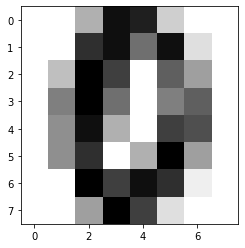

In [49]:
some_digit_image = some_digit.reshape(8, -1)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
x_test.shape

(359, 64)

In [53]:
knn_classifier = KNeighborsClassifier() # 初始化一个实例：领近数
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(X_test)
# 获取准确度
accuracy_score(y_test, y_predict)

0.9861111111111112

In [54]:
# 或者不需要输出y_predict的话：则直接调用KNeighborsClassifier里的score方法拿到结果
knn_classifier.score(X_test, y_test)

0.9861111111111112

## 实现sklearn-knn

### 自己封装

创建一个lib包：模仿sklearn的层级来：

lib:

|-->__init__.py

|-->model_selection.py


model_selection.py 代码如下：

In [1]:
import numpy as np
from math import sqrt
from collections import Counter

class KNNClassifier:

    def __init__(self, k):
        """初始化kNN分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "KNN(k=%d)" % self.k



In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from lib.model_selection import train_test_split
from lib.neighbors import KNNClassifier


In [16]:
digits = datasets.load_iris()
X_train =  np.array([[3.39, 2.33],
             [3.11, 1.78],
             [1.34, 3.36],
             [3.58, 4.67],
             [2.28, 2.86],
             [7.42, 4.69],
             [5.74, 3.53],
             [9.17, 2.51],
             [7.79, 3.42],
             [7.93, 0.79]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
np.array([8.09, 3.36]).shape

(2,)

In [18]:
k = 6
# 初始化实例
knn_classifier = KNNClassifier(k) # 初始化一个实例：领近数
knn_classifier.fit(X_train, y_train)
# 求x点的肿瘤的可能性
y_predict = np.array([8.09, 3.36])
knn_classifier.predict(y_predict.reshape(1, -1))

array([1])

### 实现模型测试

在lib下创建model_selection.py，代码如下：

In [19]:
import numpy as np

def train_test_split(X, y, test_ratio=0.2, seed=None):
    """将数据 X 和 y 按照test_ratio分割成X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test


In [20]:
from lib.model_selection import train_test_split

In [21]:
digits = datasets.load_iris()
X = digits.data
y = digits.target

In [22]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=666)

In [23]:
k = 6
# 初始化实例
knn_classifier = KNNClassifier(k) # 初始化一个实例：领近数
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(x_test)
y_predict

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2])

In [24]:
y_test

array([1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 2])

In [25]:
sum(y_predict == y_test)/ len(y_test)

1.0

### 实现accuracy_score

In [26]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [27]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=666)

In [31]:
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(x_test)
sum(y_predict == y_test) / len(y_test)

0.9888579387186629

在lib下新建metrics.py，代码如下：

In [32]:
# 封装一下
def accuracy_score(y_true, y_predict):
    """计算y_true和accy_predict之间的准确率"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"

    return np.sum(y_true == y_predict) / len(y_true)

In [33]:
accuracy_score(y_predict, y_test)

0.9888579387186629

修改model_selection.py 代码如下：

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random

from collections import Counter
from math import sqrt
from .metrics import accuracy_score

class KNNClassifier:

    def __init__(self, k):
        """初始化kNN分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "KNN(k=%d)" % self.k


In [36]:
knn = KNNClassifier(k=4)
knn.fit(X_train, y_train)
knn.score(x_test, y_test)

0.9860724233983287